This notebook is used to generate test vectors for the DC removal module.   

In [66]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import fftpack, signal

In [67]:
Fs = 5125
F = 1000
t = np.arange(32768)
sig = 2**10*( np.cos(2*np.pi*F/Fs*t) + 1j*np.sin(2*np.pi*F/Fs*t))+500

In [68]:
def TwoComplement(sig, bitwidth):
    if (sig < 0):
        sig = sig + 2**bitwidth
    expected_length = bitwidth // 4
    sig_value = str(hex(int(sig)))
    string_split = sig_value.split('x')
    string_split[1] = (expected_length - len(string_split[1])) * '0' + string_split[1]
    return string_split[1]

In [69]:
# write to a file
f_out = open('testvector.txt', 'w')
for item in sig:
    real_value = TwoComplement(item.real, 12)
    imag_value = TwoComplement(item.imag, 12)
    f_out.write(real_value + imag_value +' \n')
f_out.close()

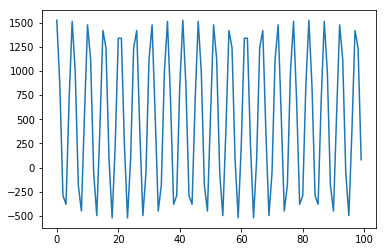

In [70]:
plt.plot(sig.real[0:100])

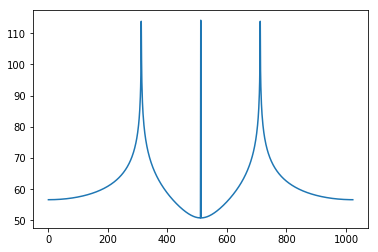

In [71]:
plt.plot(20*np.log10(np.abs(fftpack.fftshift(fftpack.fft(sig.real[0:1024])))))

In [72]:
sig.real[0]

1524.0